Observations:
    1. Capomulin is the most effective treatment, that decreased the tumor by 19% after 45 days.
    2. Other treatments don't have much effectiveness, even worse than placebo in terms of tumor volume changes over time and survival rate.
    3. Four treatments have similar errorbars, so the variables between mice are similar. 

Note: 
    1. The bar chart was done by Seaborn. 

In [2]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Load in csv
clinic_df = pd.read_csv("./raw_data/clinicaltrial_data.csv")
mouse_df = pd.read_csv("./raw_data/mouse_drug_data.csv")


In [4]:
clinic_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_df.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
#mouse_df["Drug"]=mouse_df.map({"Mouse ID":""})
merged_clinic=pd.merge(mouse_df,clinic_df,on="Mouse ID")
merged_clinic.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [7]:
compare_clinic=merged_clinic.loc[merged_clinic.Drug=="Capomulin"]
compare_clinic=compare_clinic.append(merged_clinic.loc[merged_clinic.Drug=="Infubinol"])
compare_clinic=compare_clinic.append(merged_clinic.loc[merged_clinic.Drug=="Ketapril"])
compare_clinic=compare_clinic.append(merged_clinic.loc[merged_clinic.Drug=="Placebo"])

In [9]:
time_tumor=pd.DataFrame.groupby(compare_clinic,["Drug","Timepoint"]).aggregate({"Tumor Volume (mm3)":"mean"}).unstack("Drug")

In [10]:
time_tumor_error=pd.DataFrame.groupby(compare_clinic,["Drug","Timepoint"]).aggregate({"Tumor Volume (mm3)":"sem"})


(0, 50)

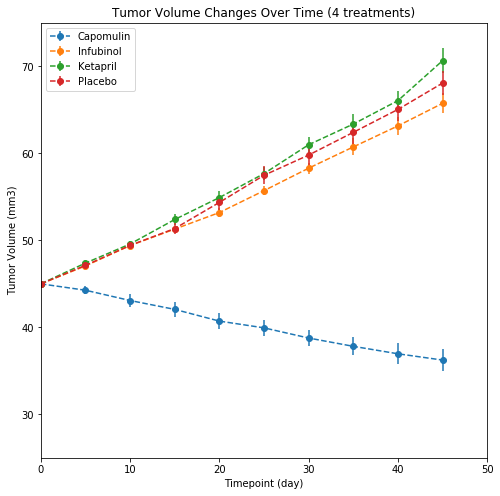

In [12]:
fig, ax1 = plt.subplots(figsize=(8,8))
time_tumor.plot(ax=ax1,fmt="--o",yerr=time_tumor_error.unstack("Drug"))
ax1.set_title("Tumor Volume Changes Over Time (4 treatments)")
ax1.set_xlabel("Timepoint (day)")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.legend(time_tumor.columns.levels[1])
ax1.set_ylim(25,75)
ax1.set_xlim(0,50)

In [13]:
metastatic=compare_clinic.groupby(["Drug","Timepoint"]).aggregate({"Metastatic Sites":"mean"}).unstack("Drug")
metastatic_error=compare_clinic.groupby(["Drug","Timepoint"]).aggregate({"Metastatic Sites":"sem"}).unstack("Drug")

(0, 50)

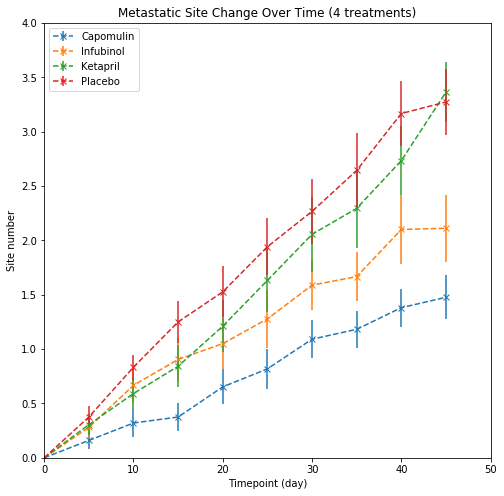

In [15]:
fig, ax2 = plt.subplots(figsize=(8,8))
metastatic.plot(ax=ax2,yerr=metastatic_error,fmt="--x")
ax2.set_title("Metastatic Site Change Over Time (4 treatments)")
ax2.set_xlabel("Timepoint (day)")
ax2.set_ylabel("Site number")
ax2.legend(metastatic.columns.levels[1],loc="upper left")
ax2.set_ylim(0,4)
ax2.set_xlim(0,50)

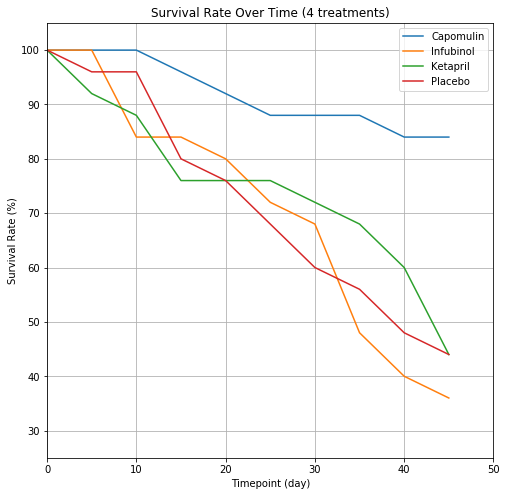

In [19]:
fig, ax3 = plt.subplots(figsize=(8,8))
mice_number=25
survival_rate=compare_clinic.groupby(["Drug","Timepoint"]).count()["Mouse ID"]/mice_number*100
survival_rate.unstack("Drug").plot(ax=ax3)
ax3.set_title("Survival Rate Over Time (4 treatments)")
ax3.set_xlabel("Timepoint (day)")
ax3.set_ylabel("Survival Rate (%)")
ax3.legend(survival_rate.unstack("Drug").columns)
ax3.set_ylim(25,105)
ax3.set_xlim(0,50)
ax3.grid()


In [20]:
tumor_change=pd.DataFrame(columns=["change rate"],index=time_tumor.columns.levels[1])

In [38]:
for i in range(len(time_tumor.columns)):
    change_rate=(time_tumor.iloc[-1,i]-time_tumor.iloc[0,i])/time_tumor.iloc[0,i]*100
    tumor_change.iloc[i,0]=change_rate


#tumor_change=[tumor_change.color.append("red")  for rate in tumor_change[["change rate"]]>0]

tumor_change.loc[tumor_change["change rate"]>0,"color"]="red"
tumor_change.loc[tumor_change["change rate"]<0,"color"]="green"


,change rate,color
Drug,,
Capomulin,-19.4753,green
Infubinol,46.1235,red
Ketapril,57.0288,red
Placebo,51.298,red


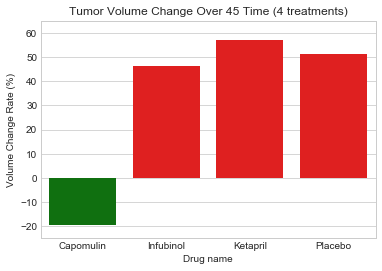

In [94]:
sns.set_style("whitegrid")
fig, ax4=plt.subplots()
ax4 = sns.barplot(x=tumor_change.index, y="change rate", data=tumor_change, palette=tumor_change.color)
ax4.set_title("Tumor Volume Change Over 45 Time (4 treatments)")
ax4.set_xlabel("Drug name")
ax4.set_ylabel("Volume Change Rate (%)")
ax4.set_ylim(-25,65)
bar_data=tumor_change["change rate"]

